# **Springboard Decision Tree Specialty Coffee Case Study - Tier 3**




# The Scenario

Imagine you've just finished the Springboard Data Science Career Track course, and have been hired by a rising popular specialty coffee company - RR Diner Coffee - as a data scientist. Congratulations!

RR Diner Coffee sells two types of item:
- specialty coffee beans, in bulk (by the kilogram only) 
- coffee equipment and merchandise (grinders, brewing equipment, mugs, books, t-shirts)

RR Diner Coffee has three stores, two in Europe and one in the United States. The flagshap store is in the US, and everything is quality assessed there, before being shipped out. Customers further away from the US flagship store have higher shipping charges. 

You've been taken on at RR Diner Coffee because the company is turning towards using data science and machine learning to systematically make decisions about which coffee farmers they should strike deals with. 

RR Diner Coffee typically buys coffee from farmers, processes it on site, brings it back to the US, roasts it, packages it, markets it, and ships it (only in bulk, and after quality assurance) to customers internationally. These customers all own coffee shops in major cities like New York, Paris, London, Hong Kong, Tokyo, and Berlin. 

Now, RR Diner Coffee has a decision about whether to strike a deal with a legendary coffee farm (known as the **Hidden Farm**) in rural China: there are rumors their coffee tastes of lychee and dark chocolate, while also being as sweet as apple juice. 

It's a risky decision, as the deal will be expensive, and the coffee might not be bought by customers. The stakes are high: times are tough, stocks are low, farmers are reverting to old deals with the larger enterprises and the publicity of selling *Hidden Farm* coffee could save the RR Diner Coffee business. 

Your first job, then, is ***to build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by RR Diner Coffee's most loyal customers.*** 

To this end, you and your team have conducted a survey of 710 of the most loyal RR Diner Coffee customers, collecting data on the customers':
- age
- gender 
- salary 
- whether they have bought at least one RR Diner Coffee product online
- their distance from the flagship store in the US (standardized to a number between 0 and 11) 
- how much they spent on RR Diner Coffee products on the week of the survey 
- how much they spent on RR Diner Coffee products in the month preceding the survey
- the number of RR Diner coffee bean shipments each customer has ordered over the preceding year. 

You also asked each customer participating in the survey whether they would buy the Hidden Farm coffee, and some (but not all) of the customers gave responses to that question. 

You sit back and think: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. There's some doubt in your mind about whether 70% is a reasonable threshold, but it'll do for the moment. 

To solve the problem, then, you will build a decision tree to implement a classification solution. 


-------------------------------
As with other case studies in this course, this notebook is **tiered**, meaning you can elect the tier that is right for your confidence and skill level. There are 3 tiers, with tier 1 being the easiest and tier 3 being the hardest. This is ***tier 3***. 

**1. Sourcing and loading** 
- Import packages
- Load data
- Explore the data

 
**2. Cleaning, transforming, and visualizing**
- Cleaning the data
- Train/test split
  
  
**3. Modeling** 
- Model 1: Entropy model - no max_depth
- Model 2: Gini impurity model - no max_depth
- Model 3: Entropy model - max depth 3
- Model 4: Gini impurity model - max depth 3


**4. Evaluating and concluding** 
- How many customers will buy Hidden Farm coffee?
- Decision

**5. Random Forest** 
- Import necessary modules
- Model
- Revise conclusion
    

# 0. Overview

This notebook uses decision trees to determine whether the factors listed above (salary, gender, age, how much money the customer spent last week and during the preceding month on RR Diner Coffee products, how many kilogram coffee bags the customer bought over the last year, whether they have bought at least one RR Diner Coffee product online, and their distance from the flagship store in the USA), could predict whether customers would purchase the Hidden Farm coffee if a deal with its farmers were struck. 

# 1. Sourcing and loading
## 1a. Import Packages

In [1]:
from typing import Type

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import Image
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
# from sklearn.externals.six import StringIO  

%matplotlib inline

## 1b. Load data 

In [2]:
# Read in the data to a variable called coffeeData
cdf = pd.read_csv('RRDinerCoffeeData.csv')
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


## 1c. Explore the data

As we've seen, exploration entails doing things like checking out the **initial appearance** of the data with head(), the **dimensions** of our data with .shape, the **data types** of the variables with .info(), the **number of non-null values**, how much **memory** is being used to store the data, and finally the major summary statistcs capturing **central tendancy, dispersion and the null-excluding shape of the dataset's distribution**. 

How much of this can you do yourself by this point in the course? Have a real go. 

In [3]:
# Call head() on your data 
cdf.head()

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0


In [4]:
# Call describe() on your data to get the relevant summary statistics for your data 
cdf.describe()

,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


# 2. Cleaning, transforming, and visualizing
## 2a. Cleaning the data

Some datasets don't require any cleaning, but almost all do. This one does. We need to replace '1.0' and '0.0' in the 'Decision' column by 'YES' and 'NO' respectively, clean up the values of the 'gender' column, and change the column names to words which maximize meaning and clarity. 

First, let's change the name of `spent_week`, `spent_month`, and `SlrAY` to `spent_last_week` and `spent_last_month` and `salary` respectively.

In [5]:
# Make the relevant name changes to spent_week and spent_per_week.
mapping = {'spent_week': 'spent_last_week',
           'spent_month': 'spent_last_month',
           'slray': 'salary'}

def mapper(col_name: str) -> str:
    cn = col_name.lower()
    if cn in mapping:
        cn = mapping[cn]
    return cn

cdf.rename(columns=mapper, inplace=True)
print('cols:', ', '.join(cdf.columns))

cols: age, gender, num_coffeebags_per_year, spent_last_week, spent_last_month, salary, distance, online, decision


In [6]:
# check for the unique values in non numeric columns
cdf.gender.value_counts()

Male      355
Female    340
FEMALE      1
MALE        1
F           1
male        1
female      1
f           1
M           1
Name: gender, dtype: int64

We can see a bunch of inconsistency here.

Use replace() to make the values of the `gender` column just `Female` and `Male`.

In [7]:
# Replace values to Male or Female
mapping = {k: 'Male' if k[0].lower() == 'm' else 'Female' 
           for k in cdf.gender.value_counts().index}

cdf.gender.replace(mapping, inplace=True)
cdf.gender.value_counts()

Male      358
Female    344
Name: gender, dtype: int64

In [8]:
# Check out the unique values of the column 'Decision'
cdf.decision.value_counts()

1.0    303
0.0    171
Name: decision, dtype: int64

We now want to replace `1.0` and `0.0` in the `Decision` column by `YES` and `NO` respectively.

In [9]:
cdf.decision.replace({1: 'Yes', 0: 'No'}, inplace=True)
print(cdf.decision.value_counts(), end='\n\n')

cdf.online.replace({1: 'Yes', 0: 'No'}, inplace=True)
print(cdf.online.value_counts())

Yes    303
No     171
Name: decision, dtype: int64

Yes    373
No     329
Name: online, dtype: int64


## 2b. Train/test split
To execute the train/test split properly, we need to do five things: 
1. Drop all rows with a null value in the `Decision` column, and save the result as NOPrediction: a dataset that will contain all known values for the decision 
2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis
3. Get the subset of coffeeData with null values in the `Decision` column, and save that subset as Prediction
4. Divide the NOPrediction subset into X and y, and then further divide those subsets into train and test subsets for X and y respectively
5. Create dummy variables to deal with categorical inputs

### 1. Drop all null values within the `Decision` column, and save the result as NoPrediction

In [10]:
# NoPrediction will contain all known values for the decision
# Call dropna() on coffeeData, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on coffeeData

no_pred = cdf.dropna()  # decision is the only col with NaN.
no_pred.describe()

,age,num_coffeebags_per_year,spent_last_week,spent_last_month,salary,distance
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,35.417722,2.590717,32.592827,106.727848,44731.892405,5.102898
std,13.604135,1.585211,15.758109,56.101085,25567.674430,3.354891
min,16.000000,0.000000,0.000000,0.000000,3150.000000,0.003168
25%,25.000000,1.000000,24.000000,60.000000,27284.250000,2.077965
50%,29.000000,3.000000,35.000000,113.500000,42791.500000,4.832168
75%,49.000000,4.000000,43.000000,150.000000,61621.750000,7.869086
max,90.000000,5.000000,62.000000,210.000000,172658.000000,10.986203


### 2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

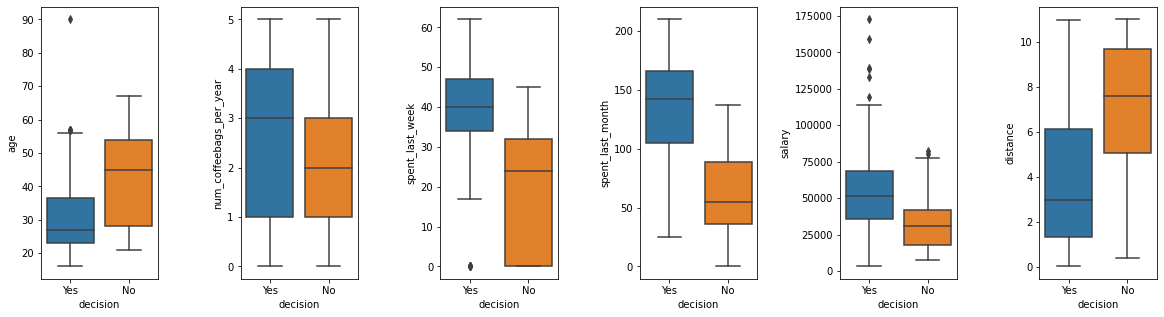

In [11]:
# Exploring our new NOPrediction dataset
# Make a boxplot on NOPrediction where the x axis is Decision, and the y axis is spent_today

ys = no_pred.select_dtypes(exclude='object').columns
fig, axes = plt.subplots(nrows=1, ncols=len(ys), figsize=(20,5))
plt.subplots_adjust(wspace=.7)

for i, y in enumerate(ys):
    sns.boxplot(x='decision', y=y, data=no_pred, ax=axes[i])

In [12]:
# Let's see if we have any pattern in categorical data: 'gender' and 'online'
cat_ys = no_pred.select_dtypes(include='object').columns
for cat_y in cat_ys:
    if cat_y != 'decision':
        piv = no_pred.pivot_table(index='decision', columns=[cat_y], values='age', aggfunc='count')
        print(piv, end='\n\n')

gender    Female  Male
decision              
No            96    75
Yes          145   158

online     No  Yes
decision          
No         86   85
Yes       145  158



Can you admissibly conclude anything from this boxplot? Write your answer here:

Such customers tend to positively respond that 1) spend more at the store, 2) live closey to the stroe, 3) earn larger salary, and 4) are relatively older.

Combining, **rich local people who don't mind to spend more for coffee would buy the new item**.

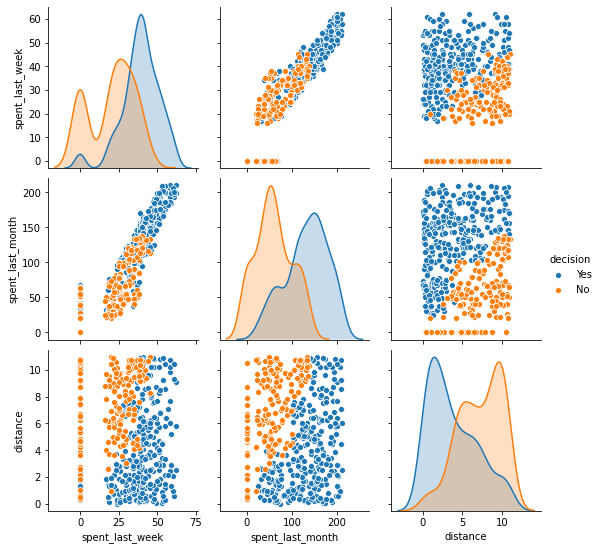

In [13]:
# Make a pairplot on NOPrediction
candidate_cols = ['spent_last_week', 'spent_last_month', 'distance']
_ = sns.pairplot(data=no_pred[candidate_cols+['decision']], hue='decision')

Can you admissibly conclude anything from this scatterplot? Remember: we are trying to build a tree to classify unseen examples. Write your answer here:

**Answer**

The combination of amount spent in the last month and distance seems to be a good indicator of their decision.
But the boundary line is diagnal, which indicates linear model (such as logistic regression) would fit better.

### 3. Get the subset of coffeeData with null values in the Decision column, and save that subset as Prediction

In [14]:
# Get just those rows whose value for the Decision column is null  
pred = cdf.loc[cdf.decision.isna()]
pred.describe()

,age,num_coffeebags_per_year,spent_last_week,spent_last_month,salary,distance
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,31.802632,2.960526,33.394737,110.407895,41923.741228,3.428836
std,14.302293,1.585514,15.697930,53.786536,27406.768360,2.153102
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.010048
25%,22.000000,2.000000,25.750000,65.000000,15911.500000,1.699408
50%,25.000000,3.000000,37.000000,113.500000,40987.500000,3.208673
75%,39.000000,4.000000,44.000000,151.250000,58537.000000,5.261184
max,67.000000,5.000000,62.000000,210.000000,182058.000000,10.871566


### 4. Divide the NOPrediction subset into X and y

In [15]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "Decision"
feats = no_pred.drop(columns='decision').columns.to_list()

# Make an explanatory variable called X, and assign it: NoPrediction[features]
X = no_pred.drop(columns='decision')

# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = no_pred.decision

### 4. Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

In [16]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 246
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=246)

### 5. Create dummy variables to deal with categorical inputs
One-hot encoding replaces each unique value of a given column with a new column, and puts a 1 in the new column for a given row just if its initial value for the original column matches the new column. Check out [this resource](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) if you haven't seen one-hot-encoding before. 

In [17]:
# One-hot encode all features in training set.
X_train = pd.get_dummies(X_train, drop_first=True)

# Do the same, but for X_test
X_test = pd.get_dummies(X_test, drop_first=True)

# 3. Modeling
It's useful to look at the scikit-learn documentation on decision trees https://scikit-learn.org/stable/modules/tree.html before launching into applying them. If you haven't seen them before, take a look at that link, in particular the section `1.10.5.` 

## Model 1: Entropy model - no max_depth

We'll give you a little more guidance here, as the Python is hard to deduce, and scikitlearn takes some getting used to.

Theoretically, let's remind ourselves of what's going on with a decision tree implementing an entropy model.

Ross Quinlan's **ID3 Algorithm** was one of the first, and one of the most basic, to use entropy as a metric.

**Entropy** is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The **Information gain** of a specific feature with a threshold (such as 'spent_last_month <= 138.0') is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold. 

Naturally, we want to minimize entropy and maximize information gain. Quinlan's ID3 algorithm is designed to output a tree such that the features at each node, starting from the root, and going all the way down to the leaves, have maximial information gain. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category. 

The first model will be the hardest. Persevere and you'll reap the rewards: you can use almost exactly the same code for the other models. 

In [18]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_mod = tree.DecisionTreeClassifier(criterion='entropy')

# Call fit() on entr_model
entr_mod.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_mod.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_mod

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

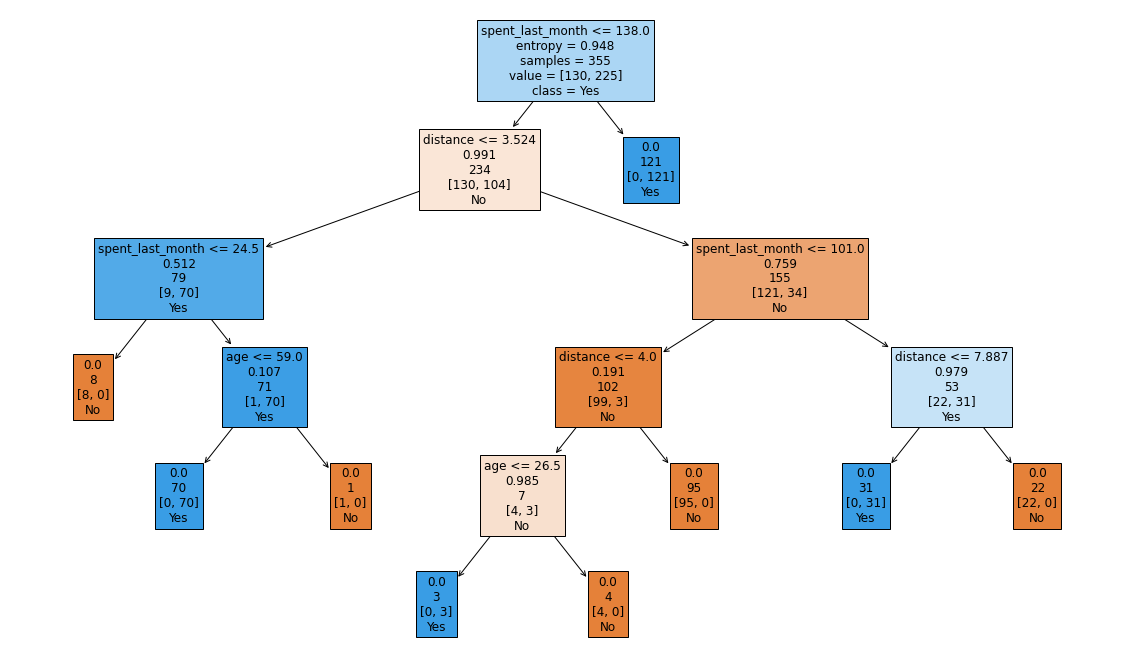

In [19]:
# Now we want to visualize the tree
plt.figure(figsize=(20,12))
_ = tree.plot_tree(entr_mod, feature_names=X_train.columns,
                   class_names=entr_mod.classes_, label='root',
                   filled=True, fontsize=12)

## Model 1: Entropy model - no max_depth: Interpretation and evaluation

In [20]:
# Run this block for model evaluation metrics 

def print_metrics(y_test: Type[np.ndarray],
                  y_pred: Type[np.ndarray]) -> None:
    print(f'Accuracy        : {metrics.accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision score : {metrics.precision_score(y_test, y_pred, pos_label = "Yes"):.4f}')
    print(f'Recall score    : {metrics.recall_score(y_test, y_pred, pos_label = "Yes"):.4f}')
    return

print('Model Entropy - no max depth')
print_metrics(y_test, y_pred)

Model Entropy - no max depth
Accuracy        : 0.9916
Precision score : 0.9873
Recall score    : 1.0000


What can you infer from these results? Write your conclusions here:

**Answer**
The model has a small portion of false positive, but accurately predict the buyers.
The tree structure is deep and relativey hard to interpret.

## Model 2: Gini impurity model - no max_depth

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Gini impurity at $k$ step is defined as:

$$G(k) = \sum_{i \in J} p(i) (1-p(i))$$

Their equations are similar, but Gini impurity doesn't require logarithmic functions, which can be computationally expensive. 

In [21]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_mod = tree.DecisionTreeClassifier(criterion='gini')

# Call fit() on the gini_model as you did with the entr_model
gini_mod.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_mod.predict(X_test)

# Turn y_pred into a series, as before
y_pred = pd.Series(y_pred)

# Check out gini_model
gini_mod

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

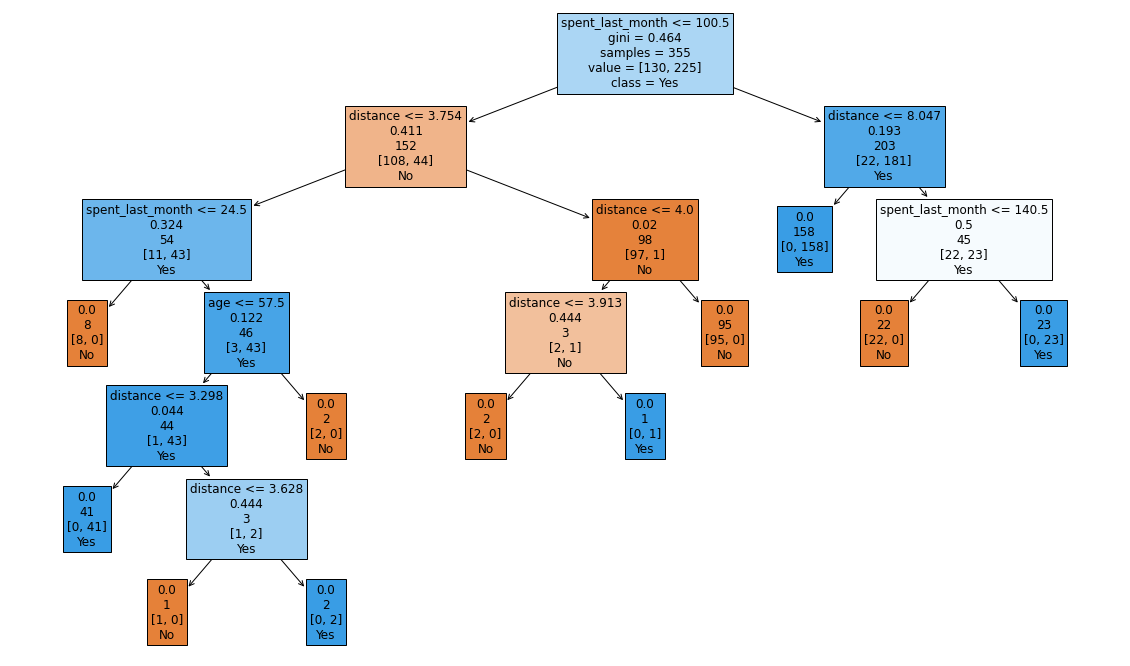

In [22]:
# As before, but make the model name gini_model
plt.figure(figsize=(20, 12))
_ = tree.plot_tree(gini_mod, feature_names=X_train.columns,
                   class_names=gini_mod.classes_, label='root',
                   filled=True, fontsize=12)

In [23]:
# Run this block for model evaluation
print("Model Gini impurity model")
print_metrics(y_test, y_pred)

Model Gini impurity model
Accuracy        : 0.9748
Precision score : 0.9747
Recall score    : 0.9872


How do the results here compare to the previous model? Write your judgments here: 

**Answer**
The model has (almost) the same precision score with entropy model and slightly lower Recall score.
Overall, they are very similar, which is intuitive given that the criteria have a similar chracteristics.
But the tree structure is even deeper and hard to interpret.

## Model 3: Entropy model - max depth 3
We're going to try to limit the depth of our decision tree, using entropy first.  

As you know, we need to strike a balance with tree depth. 

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data.

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data. 

Sophisticated data scientists use methods like random search with cross-validation to systematically find a good depth for their tree. We'll start with picking 3, and see how that goes. 

In [24]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_mod2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
entr_mod2.fit(X_train, y_train)
y_pred = pd.Series(entr_mod2.predict(X_test))

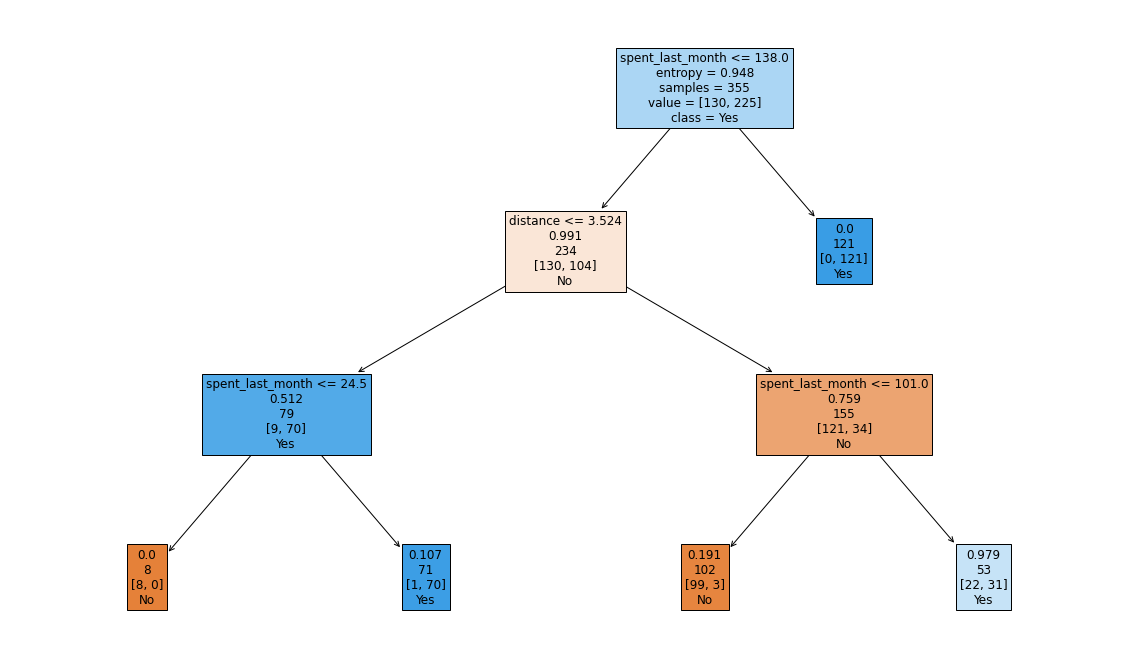

In [25]:
# As before, we need to visualize the tree to grasp its nature
plt.figure(figsize=(20, 12))
_ = tree.plot_tree(entr_mod2, feature_names=X_train.columns,
                   class_names=entr_mod2.classes_, label='root',
                   filled=True, fontsize=12)


In [26]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print_metrics(y_test, y_pred)

Model Entropy model max depth 3
Accuracy        : 0.9076
Precision score : 0.8764
Recall score    : 1.0000


So our accuracy decreased, but is this certainly an inferior tree to the max depth original tree we did with Model 1? Write your conclusions here: 

**Answer**
Tree structure is much easier to interpret, in that regards, it's not bad.
But from business perspective, we want to be more certain about the lower bound. It's okay if we sell more than what we expected, but it could be critical if we sell less than what we expected. The lower precision means higher Type-1 error, which is what we want to avoid.


## Model 4: Gini impurity  model - max depth 3
We're now going to try the same with the Gini impurity model. 

In [27]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_mod2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
gini_mod2.fit(X_train, y_train)
y_pred = pd.Series(gini_mod2.predict(X_test))

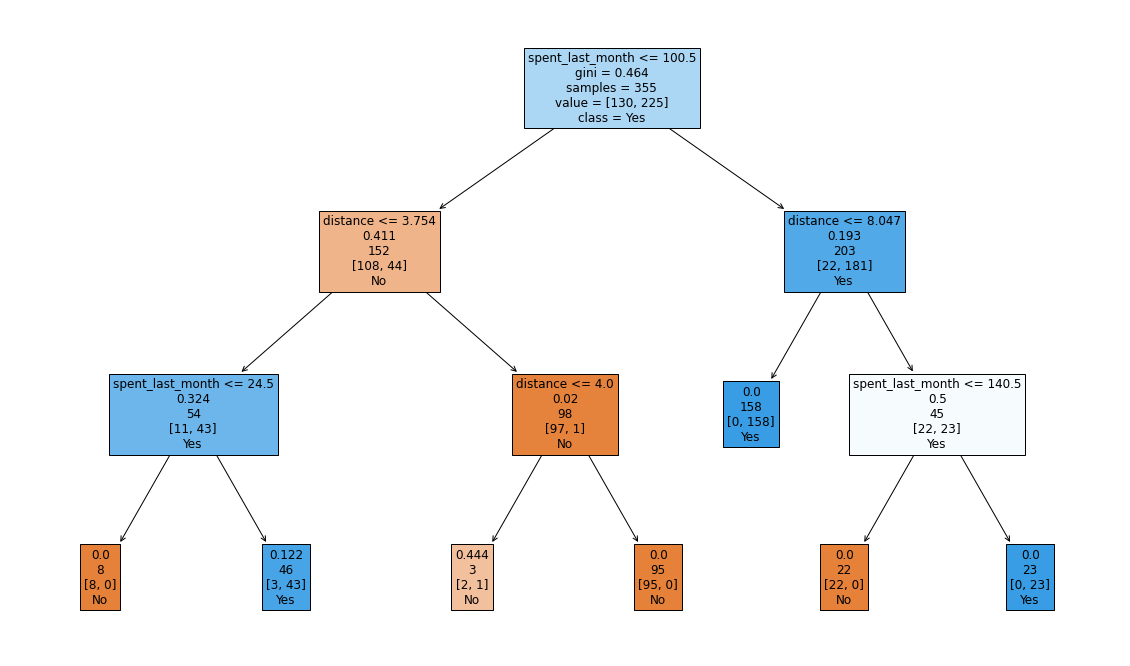

In [28]:
plt.figure(figsize=(20, 12))
_ = tree.plot_tree(gini_mod2, feature_names=X_train.columns,
                   class_names=gini_mod2.classes_, label='root',
                   filled=True, fontsize=12)

In [29]:
print("Gini impurity  model - max depth 3")
print_metrics(y_test, y_pred)

Gini impurity  model - max depth 3
Accuracy        : 0.9748
Precision score : 0.9747
Recall score    : 0.9872


Now this is an elegant tree. Its accuracy might not be the highest, but it's still the best model we've produced so far. Why is that? Write your answer here: 

**Answer**
It's a reasonable sweet spot in terms of the trade-off between interpretability and accuracy (if we care about interpretation.)
Technically, we should conclude over Bagging results (unless we do random forest) since decision trees have high variance.

# 4. Evaluating and concluding
## 4a. How many customers will buy Hidden Farm coffee? 
Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the Hidden Farm coffee. 

In [30]:
# Call value_counts() on the 'Decision' column of the original coffeeData
cdf.decision.value_counts()

Yes    303
No     171
Name: decision, dtype: int64

Let's now determine the number of people that, according to the model, will be willing to buy the Hidden Farm coffee. 
1. First we subset the Prediction dataset into `new_X` considering all the variables except `Decision` 
2. Use that dataset to predict a new variable called `potential_buyers`

In [31]:
# Feature selection
new_X = pd.get_dummies(pred.drop('decision', axis=1), drop_first=True)

In [32]:
# Prediction
pred_buyers = gini_mod2.predict(new_X)

In [33]:
for k, v in zip(*np.unique(pred_buyers, return_counts=True)):
    print(f'{k:<3}: {v:>3}')

No :  45
Yes: 183


The total number of potential buyers is 303 + 183 = 486

In [34]:
# Print the total number of surveyed people 
print('Number of surveyed people:', len(cdf))

Number of surveyed people: 702


In [35]:
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
print(f'{486/len(cdf)*100:.1f}% of the customer would buy the new coffee beans.')

69.2% of the customer would buy the new coffee beans.


## 4b. Decision
Remember how you thought at the start: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. Well now's crunch time. Are you going to go ahead with that idea? If so, you won't be striking the deal with the Chinese farmers. 

They're called `decision trees`, aren't they? So where's the decision? What should you do? (Cue existential cat emoji). 

Ultimately, though, we can't write an algorithm to actually *make the business decision* for us. This is because such decisions depend on our values, what risks we are willing to take, the stakes of our decisions, and how important it us for us to *know* that we will succeed. What are you going to do with the models you've made? Are you going to risk everything, strike the deal with the *Hidden Farm* farmers, and sell the coffee? 

The philosopher of language Jason Stanley once wrote that the number of doubts our evidence has to rule out in order for us to know a given proposition depends on our stakes: the higher our stakes, the more doubts our evidence has to rule out, and therefore the harder it is for us to know things. We can end up paralyzed in predicaments; sometimes, we can act to better our situation only if we already know certain things, which we can only if our stakes were lower and we'd *already* bettered our situation. 

Data science and machine learning can't solve such problems. But what it can do is help us make great use of our data to help *inform* our decisions.

## 5. Random Forest
You might have noticed an important fact about decision trees. Each time we run a given decision tree algorithm to make a prediction (such as whether customers will buy the Hidden Farm coffee) we will actually get a slightly different result. This might seem weird, but it has a simple explanation: machine learning algorithms are by definition ***stochastic***, in that their output is at least partly determined by randomness. 

To account for this variability and ensure that we get the most accurate prediction, we might want to actually make lots of decision trees, and get a value that captures the center or average of the outputs of those trees. Luckily, there's a method for this, known as the ***Random Forest***. 

Essentially, Random Forest involves making lots of trees with similar properties, and then performing summary statistics on the outputs of those trees to reach that central value. Random forests are hugely powerful classifers, and they can improve predictive accuracy and control over-fitting. 

Why not try to inform your decision with random forest? You'll need to make use of the RandomForestClassifier function within the sklearn.ensemble module, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

### 5a. Import necessary modules

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### 5b. Model
You'll use your X_train and y_train variables just as before.

You'll then need to make a variable (call it firstRFModel) to store your new Random Forest model. You'll assign this variable the result of calling RandomForestClassifier().

Then, just as before, you'll call fit() on that firstRFModel variable, and plug in X_train and y_train.

Finally, you should make a variable called y_pred, and assign it the result of calling the predict() method on your new firstRFModel, with the X_test data passed to it. 

In [37]:
# Plug in appropriate max_depth and random_state parameters 
rfm = RandomForestClassifier(max_features='sqrt', n_estimators=100, 
                             random_state=42)
rfm.fit(X_train, y_train)
print_metrics(y_test, rfm.predict(X_test))

print('\nPredicted counts for classifications:')
results = {}
for cl, ct in zip(*np.unique(rfm.predict(new_X), return_counts=True)):
    results[cl] = ct
    print(f'{cl:<3}: {ct:>3}')

print('\nNumber of predicted buyers:')
pred_num = (cdf.decision == 'Yes').sum() + results['Yes']
print(f'{pred_num} ({pred_num/len(cdf)*100:.2f}%)')

Accuracy        : 0.9664
Precision score : 0.9625
Recall score    : 0.9872

Predicted counts for classifications:
No :  42
Yes: 186

Number of predicted buyers:
489 (69.66%)


### 5c. Revise conclusion

Has your conclusion changed? Or is the result of executing random forest the same as your best model reached by a single decision tree? 

**Answer**
It has about the same estimates with the previous result. Conclusion has not changed, but as it's really close to the threshold, it might be a good idea to revisit how the boundary was decided and it's really reasonable or not. If we desparately need a new product (e.g. we are loosing sales, need an immediate stimulant, and has nothing else, then may be we should strike a deal).